In [111]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df

import matplotlib
import matplotlib.pyplot as plt

import os

In [2]:
data_folder = "./data/GBD_data/"
saving_folder = "./data/Cleaned_GBD_data/"
file_list = [i for i in sorted(os.listdir(data_folder)) if 'IHME-GBD' in i]

In [3]:
pdfs = []
for file in file_list:
    print("Reading {} ...".format(file))
    pdfs.append(pd.read_csv(data_folder + file))

Reading IHME-GBD_2017_DATA-302bab91-1.csv ...
Reading IHME-GBD_2017_DATA-302bab91-10.csv ...
Reading IHME-GBD_2017_DATA-302bab91-11.csv ...
Reading IHME-GBD_2017_DATA-302bab91-12.csv ...
Reading IHME-GBD_2017_DATA-302bab91-13.csv ...
Reading IHME-GBD_2017_DATA-302bab91-14.csv ...
Reading IHME-GBD_2017_DATA-302bab91-15.csv ...
Reading IHME-GBD_2017_DATA-302bab91-16.csv ...
Reading IHME-GBD_2017_DATA-302bab91-17.csv ...
Reading IHME-GBD_2017_DATA-302bab91-18.csv ...
Reading IHME-GBD_2017_DATA-302bab91-19.csv ...
Reading IHME-GBD_2017_DATA-302bab91-2.csv ...
Reading IHME-GBD_2017_DATA-302bab91-20.csv ...
Reading IHME-GBD_2017_DATA-302bab91-21.csv ...
Reading IHME-GBD_2017_DATA-302bab91-22.csv ...
Reading IHME-GBD_2017_DATA-302bab91-23.csv ...
Reading IHME-GBD_2017_DATA-302bab91-24.csv ...
Reading IHME-GBD_2017_DATA-302bab91-25.csv ...
Reading IHME-GBD_2017_DATA-302bab91-26.csv ...
Reading IHME-GBD_2017_DATA-302bab91-27.csv ...
Reading IHME-GBD_2017_DATA-302bab91-28.csv ...
Reading IHME-GB

### Data Cleaning

Splitting the dataset according to different measures. Dropping the location_id, measure_id, sex_id, age_id, cause_id, metric_id columns because they are not useful.

In [4]:
cleaned_pdfs = []
for i in range(len(pdfs)):
    cleaned_pdfs.append(pdfs[i].drop(['location_id', 'measure_id', 'sex_id', 'age_id', 'cause_id', 'metric_id'], axis=1))

# Merge into one huge data matrix
pd_all = pd.concat(cleaned_pdfs).reset_index(drop=True)
pd_all.shape

(22396332, 10)

In [65]:
pd_all.head()

2017


In [6]:
# Get all measure names
measure_names = pd_all.measure_name.unique()
# Group by and get all groups
groups_by = pd_all.groupby('measure_name')
measure_groups = dict.fromkeys(measure_names)
for measure in measure_names:
    measure_groups[measure] = groups_by.get_group(measure)

In [42]:
# Save the groups in csv
for measure in measure_names:
    filename = data_folder+measure+".csv"
    print("Saving {} to {}".format(measure, saving_folder+measure+".csv"))
    measure_groups[measure].to_csv(filename, compression="zip")
    print(measure_groups[measure].size)

Saving YLLs (Years of Life Lost) to ./data/Cleaned_GBD_data/YLLs (Years of Life Lost).csv
6336960
Saving Incidence to ./data/Cleaned_GBD_data/Incidence.csv
53726400
Saving Deaths to ./data/Cleaned_GBD_data/Deaths.csv
6336960
Saving Prevalence to ./data/Cleaned_GBD_data/Prevalence.csv
52176600
Saving YLDs (Years Lived with Disability) to ./data/Cleaned_GBD_data/YLDs (Years Lived with Disability).csv
52176600
Saving DALYs (Disability-Adjusted Life Years) to ./data/Cleaned_GBD_data/DALYs (Disability-Adjusted Life Years).csv
53209800


### Data Exploration

In [530]:
prevalence = pd.read_csv(saving_folder + "Prevalence.csv").reset_index(drop=True)
deaths = pd.read_csv(saving_folder + "Deaths.csv")
incidence = pd.read_csv(saving_folder + "Incidence.csv")
YLDs = pd.read_csv(saving_folder + "YLDs (Years Lived with Disability).csv")
DALYs = pd.read_csv(saving_folder + "DALYs (Disability-Adjusted Life Years).csv")
YLLs = pd.read_csv(saving_folder + "YLLs (Years of Life Lost).csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [532]:
#prevalence.head()


In [157]:
# Causes Levels 
level_1 = ['Mental disorders']
level_2 = ['Schizophrenia', 'Depressive disorders', 'Bipolar disorder', 'Anxiety disorders',
          'Eating disorders', 'Autism spectrum disorders', 'Attention-deficit/hyperactivity disorder', 
          'Conduct disorder', 'Idiopathic developmental intellectual disability', 'Other mental disorders']

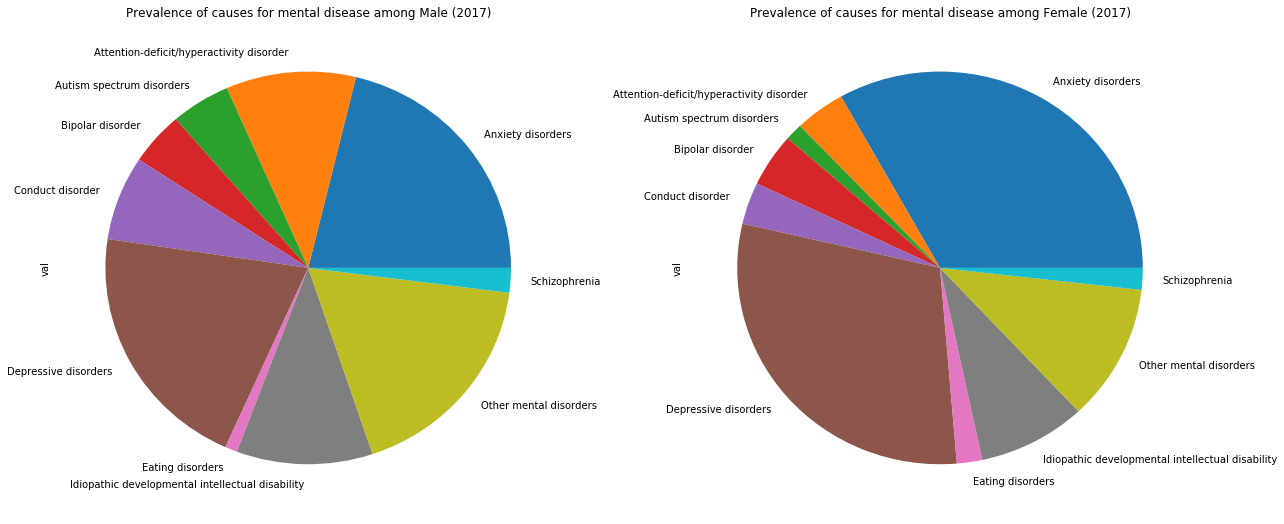

In [282]:
genders = ['Male', 'Female']

selected_sizes = np.zeros((2, len(level_2)))
selected_label = np.zeros(len(level_2))

fig, axs = plt.subplots(1, 2)
fig.tight_layout()

for gender, i in zip(genders,range(len(genders))):
    
    prevalence_gender = prevalence.loc[prevalence['sex_name'] == gender]
    gender_percent = prevalence_gender.loc[prevalence_gender['metric_name'] == 'Number'].round({'val': 6})
    gender_percent['year'] = gender_percent.year.astype(int)
    
    # Fix other columns
    gender_percent = gender_percent.loc[gender_percent['year'] == 2017]
    gender_percent = gender_percent.loc[gender_percent['age_name'] == 'All Ages']
    gender_percent = gender_percent.loc[gender_percent['location_name'] == 'Global']
    
    gender_gb = gender_percent[gender_percent.cause_name.isin(level_2)].groupby(['cause_name']).sum()
    
    selected_sizes[i] = gender_gb.val 
    selected_labels = gender_gb.index
    
    gender_gb.val.plot.pie(y=gender_gb.index, figsize=(18, 8), ax=axs[i],
                            title='Prevalence of causes for mental disease among {} (2017)'.format(gender))

In [541]:
# Rank the proportion of different types of mental disorder

gender_df = pd.DataFrame(selected_sizes, columns=selected_labels).T
gender_df.columns = genders

gender_df['Male'] = gender_df.Male / gender_df.Male.sum()
gender_df['Female'] = gender_df.Female / gender_df.Female.sum()

gender_df['Total'] = gender_df.Male + gender_df.Female

gender_df.sort_values(by='Total', ascending=False)


,Male,Female,Total
cause_name,,,
Anxiety disorders,0.212079,0.331208,0.543287
Depressive disorders,0.206531,0.299442,0.505972
Other mental disorders,0.178310,0.112414,0.290724
Idiopathic developmental intellectual disability,0.108595,0.086136,0.194731
Attention-deficit/hyperactivity disorder,0.103710,0.040136,0.143846
Conduct disorder,0.069430,0.034551,0.103981
Bipolar disorder,0.043828,0.043954,0.087782
Autism spectrum disorders,0.047454,0.013976,0.061431
Schizophrenia,0.020275,0.017935,0.038210


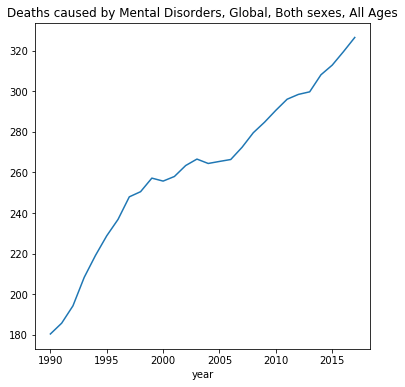

In [517]:
# Convert year to integer

# Filter Out Repeated Data
deaths_filtered = deaths.loc[deaths['sex_name'] == "Both"].loc[deaths['age_name'] == "All Ages"]

# 1. First, we look at the global trend over years 
deaths_filtered = deaths_filtered.loc[deaths['location_name'] == "Global"]

# Group by years 
deaths_gb = deaths_filtered.loc[deaths['metric_name'] == "Number"].groupby(['year']).sum()

# Plot line graph
deaths_gb.val.plot.line(x=deaths_gb.index, figsize=(6, 6),
                            title='Deaths caused by Mental Disorders, Global, Both sexes, All Ages')

,5-14 years,15-49 years
year,,
1990.0,3.999433,190.235522
1991.0,3.772494,181.927688
1992.0,3.649969,176.731593
1993.0,3.843724,262.497817
1994.0,3.964701,268.377628


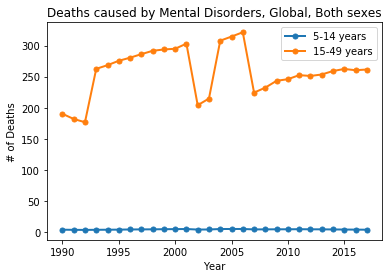

In [540]:
age_range = ['Under 5', '5-14 years', '15-49 years', '50-69 years', '70+ years']

deaths = deaths.loc[deaths['metric_name'] == "Number"]
deaths = deaths.loc[deaths['location_name'] == "Global"]
deaths = deaths.loc[deaths['cause_name'] == "Mental disorders"]
deaths = deaths.loc[deaths['sex_name'] == "Both"]

deaths_by_age_range = deaths.loc[deaths['age_name'].isin(age_range)]
deaths_all_ages = deaths.loc[deaths['age_name'] == "All Ages"]

# Seperate values for 5 Age Ranges
deaths_by_age_gb = deaths_filtered.groupby(['year']).sum()                      

# Append data to list
age_values = []
for ranges in age_range:
    list_age = deaths_by_age_range.loc[deaths['age_name'] == ranges].val
    if not list_age.empty :
        age_values.append(list_age.values)
        
        
age_range_valid = ['5-14 years', '15-49 years']  # Data is only available for 2 age ranges 

age_values_df = pd.DataFrame(age_values) # Form Dataframe from lists
age_values_df = age_values_df.T  # Take Transpose of the Dataframe (Easier to read)
age_values_df.columns = age_range_valid
age_values_df.index = deaths_by_age_gb.index

# Ploting

df = pd.DataFrame(age_values_df.values,columns=age_range_valid, index=deaths_by_age_gb.index)
ax = df.plot(lw=2, marker='.', markersize=10, title='Deaths caused by Mental Disorders, Global, Both sexes')

ax.set_xlabel("Year")
ax.set_ylabel("# of Deaths")

age_values_df.head()